# Статистический анализ данных / Python
## Задание 3

**Правила:**

* Дедлайн **1 декаюря 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.
* Задание стоит **7 баллов**.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Задача.
Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $\mathsf{H}_1\colon p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) \geqslant c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. 
Чему при этом равно $c_\alpha$ и как определяется p-value?

**Ответ:** для дискретных распределений $c_\alpha$  выбирается из условия $\mathsf{P}_{\theta_0}(T(X) > c_\alpha) = \alpha_0$, где $\alpha_0$ максимальное $\alpha_0 \leqslant \alpha$. В данном случае p-value определяется как $p(x) = \mathsf{P}_{0}(T(X) > t)$, где $t = T(x)$.

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы (можно через `pandas.DataFrame`).

Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

**Замечания**

1) Неправильно выписаны формулы для $с_\alpha$ и p-value, в коде тоже, соотвественно неверно считается. Поясняю:
$c_\alpha = u_{1-\alpha} + 1$, где $u_p$ --- $p$-квантиль $Bin(n, 0.5)$. Квантиль $u_{1-\alpha}$ означает $\mathsf{P}_{0.5}(T(X) \leqslant u_{1-\alpha}) \geqslant 1 - \alpha$, а значит $\mathsf{P}_{0.5}(T(X) > u_{1-\alpha}) \leqslant \alpha$. Поскольку распределение дискретно, то $\mathsf{P}_{0.5}(T(X) = u_{1-\alpha}) > 0$, и поэтому может случится (и даже случится) так, что $\mathsf{P}_{0.5}(T(X) \geqslant u_{1-\alpha}) > \alpha$. Этим объясняется то, что $c_\alpha = u_{1-\alpha} + 1$, а не $c_\alpha = u_{1-\alpha}$.
 
p-value определяется как $p(t) = \mathsf{P}_{0.5}(T(X) \geqslant t)$, где $t = \sum x_i$ --- реализация статистики $T(X)$. Здесь важен нестрогий знак. В определении p-value говорится: *такое же* или еще более экстремальное.
 
Соответственно $c_\alpha$ на единицу больше, чем у вас, а p-value надо считать sf.(t - 0.5), чтобы учесть и такое же значение статистики.

In [4]:
p0 = 0.5 # Вероятность в нулевой гипотезе
ns = [10, 50, 150, 250] # Размеры выборок
alpha = 0.05

ts = [] # T(x)
c_alphas = []
p_values = []

for n in ns:
    # Пока возьмем p из нулевой гипотезы для генерации выборки
    sample = sps.bernoulli(p0).rvs(n) 
    t = sample.sum()
    ts.append(t)
    p_values.append(sps.binom(n, p0).sf(t - 0.5))
    c_alphas.append(sps.binom(n, p0).ppf(1 - alpha) + 1)

pd.DataFrame({'n': ns, 'T(x)': ts, 'c_alpha': c_alphas, 'p-value': p_values})

,n,T(x),c_alpha,p-value
0,10,6.5,9.0,0.171875
1,50,21.5,32.0,0.838882
2,150,83.5,86.0,0.082453
3,250,130.5,139.0,0.243346


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

**Ответ:** очень тяжело представить, что такая зависимость есть. С точки зрения практики, при $p = 0.8$ появились бы первые мысли  вдруг все эти суеверия правда. Ох, надеюсь, что все же такие мысли не появятся :)

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [3]:
def make_experiment(n, samples_count, p, p0=0.5):
    samples = sps.bernoulli(p).rvs((samples_count, n))
    ts = samples.sum(axis=1) # Реализации T(X)
    c_alpha = sps.binom(n, p0).ppf(1 - alpha) + 1
    p_values = sps.binom(n, p0).sf(ts - 0.5)
    h0_rejected = (p_values < alpha).astype(int)
    
    print('n = {}; p = {}; alpha = {}; c_alpha = {}'
          .format(n, p, alpha, c_alpha))
    print('Отклоняем нулевую гипотезу в {:.1%} случаев'
      .format(h0_rejected.mean()))
    return pd.DataFrame({'T(x)': ts,
                         'p-value': p_values,
                         'H0_rejected': h0_rejected})

In [4]:
make_experiment(n=5, samples_count=10, p=0.75)

n = 5; p = 0.75; alpha = 0.05; c_alpha = 4.0
Отклоняем нулевую гипотезу в 60.0% случаев


,T(x),p-value,H0_rejected
0,4,0.03125,1
1,2,0.50000,0
2,3,0.18750,0
3,3,0.18750,0
4,4,0.03125,1
5,3,0.18750,0
6,4,0.03125,1
7,4,0.03125,1
8,4,0.03125,1
9,4,0.03125,1


In [5]:
make_experiment(n=100000, samples_count=10, p=0.51)

n = 100000; p = 0.51; alpha = 0.05; c_alpha = 50260.0
Отклоняем нулевую гипотезу в 100.0% случаев


,T(x),p-value,H0_rejected
0,51114,9.010218e-13,1
1,50952,8.491307e-10,1
2,50950,9.181324e-10,1
3,51299,1.024193e-16,1
4,51046,1.809612e-11,1
5,51078,4.511275e-12,1
6,51106,1.294508e-12,1
7,51065,7.970556e-12,1
8,50748,1.100612e-06,1
9,50961,5.962746e-10,1


**Вывод:**

Видно, что размер выборки, равный пяти, недостаточен для проверки гипотезы. Мощности критерия не всегда хватает, чтобы отклонять нулевую гипотезу, несмотря на $p = 0.75$.

При размере выборки 100000 обратная ситуация. Мощности критерия хватает даже при $p = 0.51$, т.е. тогда, когда результат уже практически не значим.

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

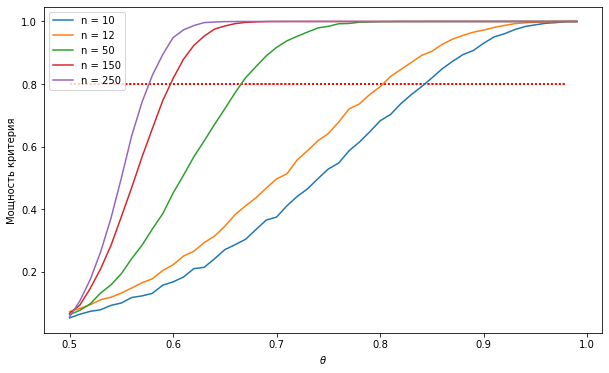

In [6]:
ns = [10, 12, 50, 150, 250] # Размеры выборок
samples_count = 10000 # Количество выборок
ps = np.arange(0.5, 0.995, 0.01)

plt.figure(figsize=(10, 6))

for n in ns:
    criterion_powers = []
    
    for p in ps:
        samples = sps.bernoulli(p).rvs((samples_count, n))
        ts = samples.sum(axis=1) # Реализации T(X)
        c_alpha = sps.binom(n, p0).ppf(1 - alpha) + 1
        p_values = sps.binom(n, p0).sf(ts - 0.5)
        criterion_powers.append((p_values < alpha).mean())
    
    plt.plot(ps, criterion_powers, label='n = '+str(n))
    plt.xlabel(r'$\theta$')
    plt.ylabel('Мощность критерия')
    plt.legend()
    plt.hlines(0.8, 0.5, 0.98, color='red', linestyles='dotted')

По графику выбираем размер выборки $n^* = 12$ с мощностью критерия примерно равной 0.8 при $p^* = 0.8$

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [7]:
make_experiment(n=12, samples_count=10, p=0.6)

n = 12; p = 0.6; alpha = 0.05; c_alpha = 9.0
Отклоняем нулевую гипотезу в 20.0% случаев


,T(x),p-value,H0_rejected
0,5,0.612793,0
1,5,0.612793,0
2,7,0.193848,0
3,7,0.193848,0
4,8,0.072998,0
5,7,0.193848,0
6,9,0.019287,1
7,5,0.612793,0
8,8,0.072998,0
9,10,0.003174,1


In [8]:
make_experiment(n=12, samples_count=10, p=0.9)

n = 12; p = 0.9; alpha = 0.05; c_alpha = 9.0
Отклоняем нулевую гипотезу в 90.0% случаев


,T(x),p-value,H0_rejected
0,12,0.000000,1
1,11,0.000244,1
2,11,0.000244,1
3,12,0.000000,1
4,11,0.000244,1
5,9,0.019287,1
6,9,0.019287,1
7,11,0.000244,1
8,12,0.000000,1
9,8,0.072998,0


**Вывод:**

При планировании эксперимента можно заранее определять необходимый размер выборки, достаточный для выявления значимого практического отклонения. Но при этом теряется возможность выявления отклонения меньше практически значимого (ну еще бы, мы же по нему мощность критерия подбирали). Что в принципе хорошо, т.к. мы не будем получать бесполезных результатов.